# 필수 과제
- 트위터에 대통령 선거 관련된 문자열 데이터 
- 대통령 이름도 있고, 여러가지 후보자 이름도 있을 것
- 정규식으로 전처리하고, 실제 의미있는 키워드를 빈도를 추출하고
- 후보자와 관련이 가장 깊은 키워드는 무엇인지? 
- 간단하게 시각화하여 실제로 어떤 후보자가 어떤 키워드를 가지고 있다는 것을 보여주세요!

In [1]:
import pandas as pd
import re

In [2]:
tweet = pd.read_csv('tweet_jae.csv')

In [3]:
tweet

,status_id,screen_name,created_at,text
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,-&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n...
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,"""차기선호도 이재명 19% 이낙연 17%…첫 역전""(종합)https://t.co/n..."
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,"안철수 시즌2라~~~ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ [‘이낙연 대세론’ 흔들…이재명,..."
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,@yonhaptweet SNS로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이...
...,...,...,...,...
8561,1293704470996557824,QVh027,2020-08-13 00:22:36,이재명이가 추진하고 있는 토지 공개념화에 대한 대법원 판례가 규제를 인정했다고 해서...
8562,1293706115528527873,hezii631,2020-08-13 00:29:08,인물열전] 이재명에게서 노무현을 보다…“진짜 민주주의를 향한 위대한 발걸음”\n온라...
8563,1293704734507859969,junsun88,2020-08-13 00:23:39,@Jaemyung_Lee 믿을 사람은 이재명뿐이요 ㅡ토지거래허가제 당장해서 실...
8564,1293704250019549184,hjg002,2020-08-13 00:21:43,"뻐꾹이와 이재명, 김경수까지 변호를? 그 피데스 동지들이 법을 유린하고 있다 많이 ..."


In [12]:
tweet['text'].head(20)

0     -&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n...
1     "차기선호도 이재명 19% 이낙연 17%…첫 역전"(종합)https://t.co/n...
2     안철수 시즌2라~~~ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ [‘이낙연 대세론’ 흔들…이재명,...
3     조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...
4     @yonhaptweet SNS로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이...
5                    이재명 지지자건 이낙연 지지자건\n문재인이 뭐 물렀느니 어쩌니
6                                    이낙연은 회피형\n이재명은 뻥카형
7     @Timesegment 유튜브 올렸는데요\n결론은\n안철수대표가 \n이재명대 안철수...
8     정치권 화두는 '지지율 희비'···여권 중진들 "부동산 정책 영향, 딛고 일어서야"...
9     김남국 "이낙연 의원은 (현안에 대해) 신중한 태도를 보이고 있지만, 이재명 경기도...
10    갤럽 \n\n더불어민주당 지지층 \n이낙연 37%  이재명28%\n\n통합당 지지층...
11    @nylee21 이낙연 의원님이 어서 민주당 당대표가 되셔서 안정을 찾아야 할것 같...
12    @nylee21 요즘 이재명 지지자란 것들이 이낙연 의원님에 대한 흑색선전 퍼뜨리고...
13    @nylee21 이때다 싶어 정부여당에 총질하는 이재명 박주민\n\n저렇게 타 후보...
14    @nylee_office @nylee21 문재인 대통령님과 이낙연 의원님-사람이 먼...
15    생각해보니...\n미통당이 민주당을 지지율 역전했다고 언플한 다음날\n이재명이 이낙...
16    이거만 봐도 안다 누가 사이다냐?\n광복절에 아베 때리는거? 그거 누구나\n할 수 ...
17    오늘 정치신세계에서 이낙연 의원님 말씀들\n언론 많이 노출될 수 있게 노력좀

In [19]:
#text에서 영어, 숫자, 불필요한 요소들 제거
tweet['text'] = tweet['text'].str.replace('[a-zA-Zㄱ-ㅎ\-@&;]',"")

C:\Users\dlagm\AppData\Local\Temp\ipykernel_9692\2749176130.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet['text'] = tweet['text'].str.replace('[a-zA-Zㄱ-ㅎ\-@&;]',"")


In [20]:
tweet['text'].head(20)

0      (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n\n10....
1                "차기선호도 이재명 19% 이낙연 17%…첫 역전"(종합)://./4
2     안철수 시즌2라~~~ [‘이낙연 대세론’ 흔들…이재명, 여권 추락 속 홀로 날......
3     조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...
4      로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이낙연\n당연히 이낙연 아닌가...
5                    이재명 지지자건 이낙연 지지자건\n문재인이 뭐 물렀느니 어쩌니
6                                    이낙연은 회피형\n이재명은 뻥카형
7      유튜브 올렸는데요\n결론은\n안철수대표가 \n이재명대 안철수\n이낙연대 안철수\n...
8     정치권 화두는 '지지율 희비'···여권 중진들 "부동산 정책 영향, 딛고 일어서야"...
9     김남국 "이낙연 의원은 (현안에 대해) 신중한 태도를 보이고 있지만, 이재명 경기도...
10    갤럽 \n\n더불어민주당 지지층 \n이낙연 37%  이재명28%\n\n통합당 지지층...
11    21 이낙연 의원님이 어서 민주당 당대표가 되셔서 안정을 찾아야 할것 같습니다\n이...
12    21 요즘 이재명 지지자란 것들이 이낙연 의원님에 대한 흑색선전 퍼뜨리고 다닙니다\...
13    21 이때다 싶어 정부여당에 총질하는 이재명 박주민\n\n저렇게 타 후보와 당원을 ...
14    _ 21 문재인 대통령님과 이낙연 의원님사람이 먼저다<+0001499>\n\n언론이...
15    생각해보니...\n미통당이 민주당을 지지율 역전했다고 언플한 다음날\n이재명이 이낙...
16    이거만 봐도 안다 누가 사이다냐?\n광복절에 아베 때리는거? 그거 누구나\n할 수 ...
17    오늘 정치신세계에서 이낙연 의원님 말씀들\n언론 많이 노출될 수 있게 노력좀

In [4]:
from konlpy.tag import Twitter

In [7]:
twt = Twitter()

C:\Users\dlagm\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [17]:
#어떤 후보자가 나오는지 대강 보기 위해 명사만 추출
all_words = []
parts = ['Noun'] #명사 추출
for i in range(len(tweet)):
    text = tweet['text'][i]
    words = twt.pos(text)
    for n in words:
        if n == 'EOS' or n == "":
            continue
        word_tmp = n[0]
        part = n[1]
        if not (part in parts):
            continue
        all_words.append(word_tmp)
    if len(all_words) >= 1000: #너무 많아서 1000개까지 추출
        break
print(all_words)

['지난', '개월', '동안', '엎치락뒤치락', '안', '본격', '것', '이재명', '적극', '행보', '이낙연', '행보', '최근', '현안', '대한', '태도', '한번', '보라', '참고', '사랑', '교회', '목사', '관련', '이낙연', '의원', '직접', '기한', '상태', '이재명', '경기도', '대변인', '통해', '언급', '차기', '선호', '이재명', '이낙연', '첫', '역전', '종합', '안철수', '시즌', '이낙연', '세론', '이재명', '여권', '추락', '속', '홀로', '날', '조작', '모자라', '갤럽', '제대로', '대통령', '당', '지지율', '이재명', '오른', '이유', '뭔가', '조작', '이재명', '이낙연', '차기', '정치인', '선호', '역전', '로', '폭우', '이재명', '수해', '현장', '구슬', '땀', '이낙연', '이낙연', '전', '고추', '점', '이재명', '지지', '자건', '이낙연', '지지', '자건', '문재인', '뭐', '어쩌', '이낙연', '회피', '이재명', '뻥카', '유튜브', '결론', '안철수', '대표', '이재명', '안철수', '이낙연', '안철수', '대도', '정치권', '화두', '지지율', '희비', '여권', '중진', '부동산', '정책', '영향', '김', '남국', '이낙연', '의원', '현안', '대해', '태도', '보이', '이재명', '도지사', '사이다', '얘기', '보', '지지율', '것', '유권자', '문제해결', '능력', '가르마', '리더십', '찢빠', '구', '찢', '정치', '갤럽', '민주당', '지층', '이낙연', '이재명', '통합', '지층', '이낙연', '명', '정의당', '지층', '이낙연', '명', '무당', '층', '이낙연', '명', '호남', '이낙연', '명', '부울경', '이낙연', '명', '이낙연', '의원님',

- 이재명
- 이낙연
- 안철수

In [24]:
#후보자별 빈도수 높은 키워드 정리
#이재명
mylist_ljm = []
for i in range(len(tweet)):
    if ('이재명' in tweet['text'][i]) == True:
        mylist_ljm.append(tweet['text'][i])

In [95]:
all_words = []
parts = ['Noun'] #명사 추출
for i in range(len(mylist_ljm)):
    text = mylist_ljm[i]
    words = twt.pos(text)
    for n in words:
        if n == 'EOS' or n == "" or len(n[0]) == 1: #길이가 1개인 것도 제외
            continue
        word_tmp = n[0]
        part = n[1]
        if not (part in parts):
            continue
        all_words.append(word_tmp)
print(len(all_words))

99518


In [96]:
all_words_ljm = all_words

In [102]:
dict_ljm = {}
list_ljm = []
for i in range(len(all_words_ljm)):
    dict_ljm[str(all_words_ljm[i])] = 0 #딕셔너리 0으로 초기화
for i in range(len(all_words_ljm)):
    dict_ljm[str(all_words_ljm[i])] += 1 #개수 세기
    if dict_ljm[str(all_words_ljm[i])] >= 500: #500개 이상인 것만 추출
        if str(all_words_ljm[i]) in list_ljm:
               continue
        list_ljm.append(str(all_words_ljm[i]))
        
print(list_ljm)

['이재명', '이낙연', '경기도', '지사', '민주당', '지지율', '사람', '대통령', '국민', '후보', '코로나']


In [117]:
#한글 폰트 깨짐 방지
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font',family='AppleGothic') 
    
%matplotlib inline

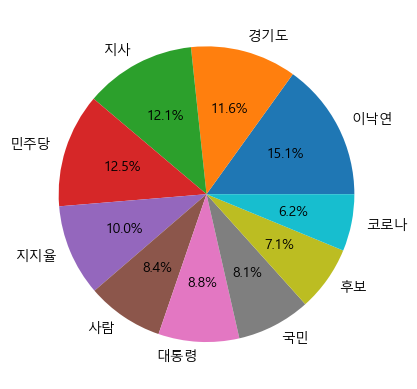

In [120]:
import matplotlib.pyplot as plt
labels = ['이낙연', '경기도', '지사', '민주당', '지지율', '사람', '대통령', '국민', '후보', '코로나']
values = [1226,944,988,1015,814,685,718,657,580,506]
plt.pie(values, labels=labels, autopct='%.1f%%')
plt.show()

In [121]:
#이낙연
mylist_ljm = []
for i in range(len(tweet)):
    if ('이낙연' in tweet['text'][i]) == True:
        mylist_ljm.append(tweet['text'][i])
all_words = []
parts = ['Noun'] #명사 추출
for i in range(len(mylist_ljm)):
    text = mylist_ljm[i]
    words = twt.pos(text)
    for n in words:
        if n == 'EOS' or n == "" or len(n[0]) == 1: #길이가 1개인 것도 제외
            continue
        word_tmp = n[0]
        part = n[1]
        if not (part in parts):
            continue
        all_words.append(word_tmp)
dict_ljm = {}
list_ljm = []
for i in range(len(all_words_ljm)):
    dict_ljm[str(all_words_ljm[i])] = 0 #딕셔너리 0으로 초기화
for i in range(len(all_words_ljm)):
    dict_ljm[str(all_words_ljm[i])] += 1 #개수 세기
    if dict_ljm[str(all_words_ljm[i])] >= 500: #500개 이상인 것만 추출
        if str(all_words_ljm[i]) in list_ljm:
               continue
        list_ljm.append(str(all_words_ljm[i]))
        
print(list_ljm)

['이재명', '이낙연', '경기도', '지사', '민주당', '지지율', '사람', '대통령', '국민', '후보', '코로나']


In [122]:
#안철수
mylist_ljm = []
for i in range(len(tweet)):
    if ('안철수' in tweet['text'][i]) == True:
        mylist_ljm.append(tweet['text'][i])
all_words = []
parts = ['Noun'] #명사 추출
for i in range(len(mylist_ljm)):
    text = mylist_ljm[i]
    words = twt.pos(text)
    for n in words:
        if n == 'EOS' or n == "" or len(n[0]) == 1: #길이가 1개인 것도 제외
            continue
        word_tmp = n[0]
        part = n[1]
        if not (part in parts):
            continue
        all_words.append(word_tmp)
dict_ljm = {}
list_ljm = []
for i in range(len(all_words_ljm)):
    dict_ljm[str(all_words_ljm[i])] = 0 #딕셔너리 0으로 초기화
for i in range(len(all_words_ljm)):
    dict_ljm[str(all_words_ljm[i])] += 1 #개수 세기
    if dict_ljm[str(all_words_ljm[i])] >= 500: #500개 이상인 것만 추출
        if str(all_words_ljm[i]) in list_ljm:
               continue
        list_ljm.append(str(all_words_ljm[i]))
        
print(list_ljm)

['이재명', '이낙연', '경기도', '지사', '민주당', '지지율', '사람', '대통령', '국민', '후보', '코로나']


In [125]:
mylist_ljm

['안철수 시즌2라~~~ [‘이낙연 대세론’ 흔들…이재명, 여권 추락 속 홀로 날...] ://./3',
 ' 유튜브 올렸는데요\n결론은\n안철수대표가 \n이재명대 안철수\n이낙연대 안철수\n그런대도 이긴다고요 ',
 '이재명 지사 19%, 이낙연 의원 17%, 윤석열 검찰총장 9%, 안철수 국민의당 대표 3%, 홍준표 무소속 의원 2% 순. \n\n://./75',
 '이재명지지자들 중엔 이성적이고 상식적인 사람들이 많을 수 밖에.  이재명 자체가 그러니. 그는 안철수처럼 어벙벙하고 모질하고 칠칠한 스타일도 아니고 문재인이나 이낙연처럼 두리뭉실 답답하고 말만 앞서지도 않으니 지지자가 태극기나 똥파리들과 다를 수 밖에. ://./5',
 '[폴리뉴스] [한국갤럽] 차기 이재명 오차범위내 역전...이재명19%이낙연17%윤석열9%안철수3% ://./52 \n\n지금껏 행정력 하나만으로 대권후보 1위한 사람이 없었다. 우리는 지금껏 보지 못했던 새로운 유형의 대권후보를 마주하고 있다. 이재명은 전설이다',
 '이재명 1위? 후훗 안철수때랑 흐름 똑같네. 민주당 지지자보다 미통당과 정의당, 극좌 극우꼴통들한테 지지받는걸로 나오는 이재명. 현재 미통당 변변한 후보없으니 이재명띄워 이낙연 견제하는데 기레기들과 진보일베 보수일베 함묵적 동의로 움직이는데 그래봤자 안초딩 시즌2다',
 "차기 선호도 1위 '이재명 19%'<+0001947>, 이낙연 17%<+0001948>\n이어 윤석열 9%<+0001949>, 안철수 3%, 홍준표 2%\n#대권선호도 #이재명 #여론조사\n://./4",
 '이재명\n이쯤이면 기본소득당에 갔어야 맞지않나...\n통합당이 이재명과 스탠스를 맞추네\n다음은 민주당 이낙연과\n외연확장한 통합당 이재명\n그리고 안철수...\n이렇게 대선 시작할듯',
 '이낙연은 딱 거 누구더라. 유엔 사무 총장 하던 양반 꼴 아닌가. 이름도 생각 안나네. 곧 잊혀지겠지. 자 이제 호남이 이재명을 지지할까. 민주당은 곧 자중지란으로 빠진다. 이래서 안철수의 바른정당

위의 리스트를 보면 후보자의 이름인 이재명, 이낙연, 안철수가 한 글에 같이 
등장하는 모습을 많이 볼 수 있다. 따라서 후보자 세 명과 관련된 키워드는 동일하게 나온다.